# PSB injection bump in Xsuite - setup chicane

In [1]:
%matplotlib notebook

In [2]:
# Import modules
import matplotlib.pyplot as plt
import numpy as np

import xtrack as xt
import xpart as xp
import xdeps as xd

from cpymad.madx import Madx

###  Load line from previous notebook

In [3]:
# Reload
line = xt.Line.from_json('psb_00_from_mad.json')
line.build_tracker()

Done loading line from dict.           
Found suitable prebuilt kernel `default_only_xtrack`.


In [4]:
# A few checks on the imported model
line.vars['k0bi1bsw1l11']._info() # Check that the knob controls k0 and the edges

#  vars['k0bi1bsw1l11']._get_value()
   vars['k0bi1bsw1l11'] = 0.0

#  vars['k0bi1bsw1l11']._expr is None

#  vars['k0bi1bsw1l11']._find_dependant_targets()
   element_refs['bi1.bsw1l1.1_dex'].r43
   element_refs['bi1.bsw1l1.1_dex'].r21
   element_refs['bi1.bsw1l1.1'].k0
   element_refs['bi1.bsw1l1.1_den'].r43
   element_refs['bi1.bsw1l1.1_den'].r21



In [5]:
line.element_refs['bi1.bsw1l1.1'].h._info() # Check no reference system curvature

#  element_refs['bi1.bsw1l1.1'].h._get_value()
   element_refs['bi1.bsw1l1.1'].h = 0.0

#  element_refs['bi1.bsw1l1.1'].h._expr is None

#  element_refs['bi1.bsw1l1.1'].h does not influence any target



### Build chicane knob (k0)

In [6]:
line.vars['bsw_k0l'] = 0 # knob controlling the four magnets
line.vars['k0bi1bsw1l11'] =  line.vars['bsw_k0l'] / line['bi1.bsw1l1.1'].length
line.vars['k0bi1bsw1l12'] = -line.vars['bsw_k0l'] / line['bi1.bsw1l1.2'].length
line.vars['k0bi1bsw1l13'] = -line.vars['bsw_k0l'] / line['bi1.bsw1l1.3'].length
line.vars['k0bi1bsw1l14'] =  line.vars['bsw_k0l'] / line['bi1.bsw1l1.4'].length

In [7]:
# Inspect
line.vars['k0bi1bsw1l11']._info()

#  vars['k0bi1bsw1l11']._get_value()
   vars['k0bi1bsw1l11'] = 0.0

#  vars['k0bi1bsw1l11']._expr
   vars['k0bi1bsw1l11'] = (vars['bsw_k0l']/0.313)

#  vars['k0bi1bsw1l11']._expr._get_dependencies()
   vars['bsw_k0l'] = 0

#  vars['k0bi1bsw1l11']._find_dependant_targets()
   element_refs['bi1.bsw1l1.1_dex'].r43
   element_refs['bi1.bsw1l1.1_dex'].r21
   element_refs['bi1.bsw1l1.1'].k0
   element_refs['bi1.bsw1l1.1_den'].r43
   element_refs['bi1.bsw1l1.1_den'].r21



### Build knob to model eddy currents (k2)

In [8]:
# Build knob to model eddy currents (k2)
line.vars['bsw_k2l'] = 0
line.element_refs['bi1.bsw1l1.1'].knl[2] = line.vars['bsw_k2l']
line.element_refs['bi1.bsw1l1.2'].knl[2] = -line.vars['bsw_k2l']
line.element_refs['bi1.bsw1l1.3'].knl[2] = -line.vars['bsw_k2l']
line.element_refs['bi1.bsw1l1.4'].knl[2] = line.vars['bsw_k2l']

In [9]:
# Inspect
line.element_refs['bi1.bsw1l1.3'].knl[2]._info()

#  element_refs['bi1.bsw1l1.3'].knl[2]._get_value()
   element_refs['bi1.bsw1l1.3'].knl[2] = 0.0

#  element_refs['bi1.bsw1l1.3'].knl[2]._expr
   element_refs['bi1.bsw1l1.3'].knl[2] = (-vars['bsw_k2l'])

#  element_refs['bi1.bsw1l1.3'].knl[2]._expr._get_dependencies()
   vars['bsw_k2l'] = 0

#  element_refs['bi1.bsw1l1.3'].knl[2] does not influence any target



### Use twiss to check the knobs

Check effect on the orbit and beta functions

Found suitable prebuilt kernel `only_xtrack_frozen_energy`.


<IPython.core.display.Javascript object>


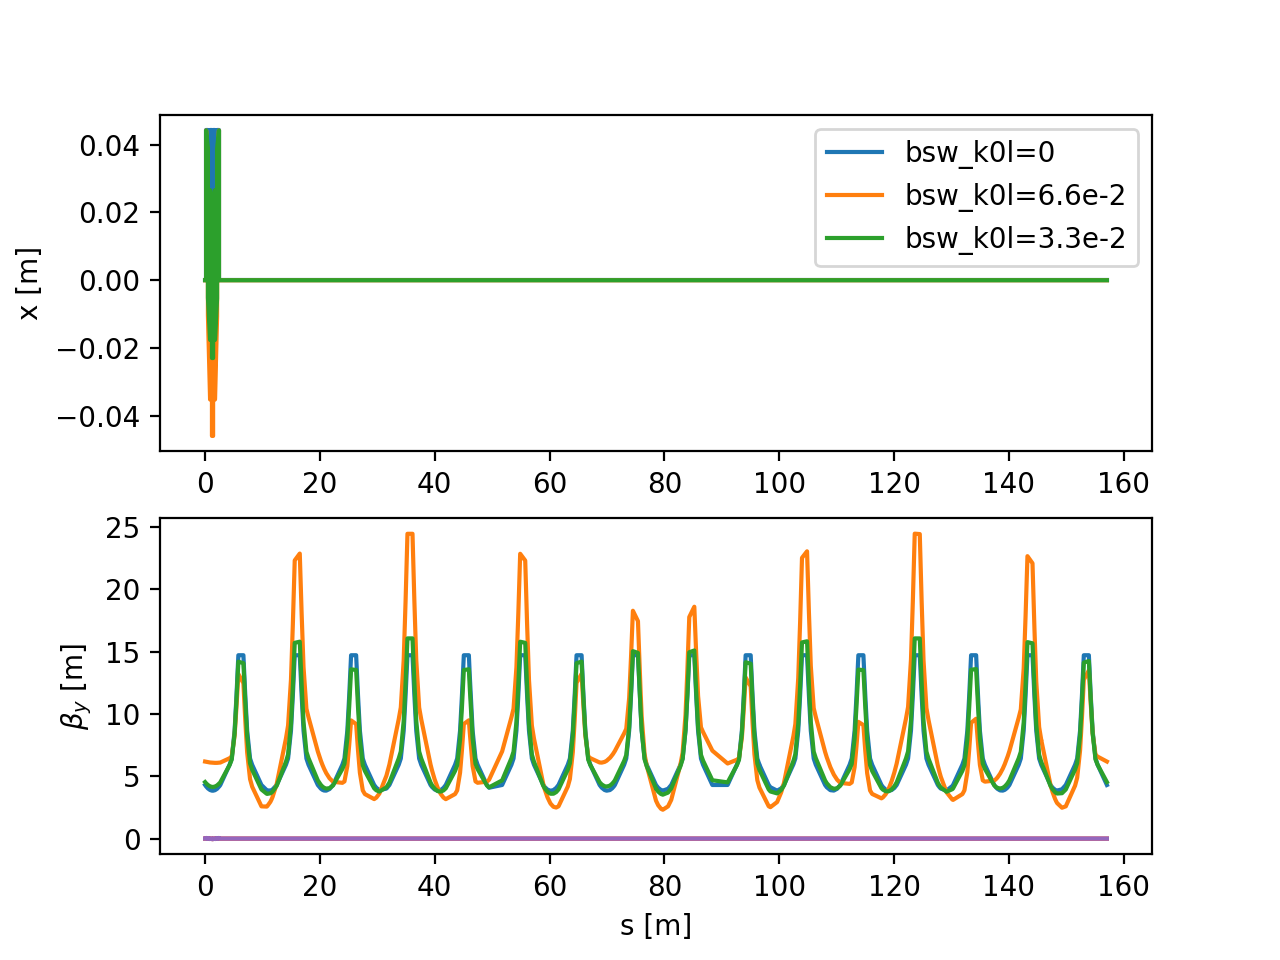

Text(0.5, 0, 's [m]')

In [10]:
line.vars['bsw_k0l'] = 0 # Bump off
tw0 = line.twiss()
line.vars['bsw_k0l'] = 6.6e-2 # Full bump amplitude
tw1 = line.twiss()
line.vars['bsw_k0l'] = 3.3e-2 # Half bump amplitude
tw2 = line.twiss()

plt.figure(1, figsize=(6.4, 4.8))
sp1 = plt.subplot(2,1,1)
plt.plot(tw0.s, tw0.x, label='bsw_k0l=0')
plt.plot(tw1.s, tw1.x, label='bsw_k0l=6.6e-2')
plt.plot(tw2.s, tw2.x, label='bsw_k0l=3.3e-2')
plt.ylabel('x [m]') 
plt.legend()
sp2 = plt.subplot(2,1,2, sharex=sp1)
plt.plot(tw0.s, tw0.bety)
plt.plot(tw1.s, tw1.bety)
plt.plot(tw2.s, tw2.bety)
plt.ylabel(r'$\beta_y$ [m]')
plt.xlabel(r's [m]')

Check that eddy currents knob affects beta functions and chromaticity

In [11]:
line.vars['bsw_k0l'] = 6.6e-2 * 0.95
line.vars['bsw_k2l'] = 0
tw_eddy_off = line.twiss()
line.vars['bsw_k2l'] = -9.7429e-2 # Full ramp rate
tw_eddy_on = line.twiss()

In [12]:
# Effect on chromaticity
tw_eddy_off.dqy, tw_eddy_on.dqy

(-7.779090117843168, -8.164257816440923)

<IPython.core.display.Javascript object>


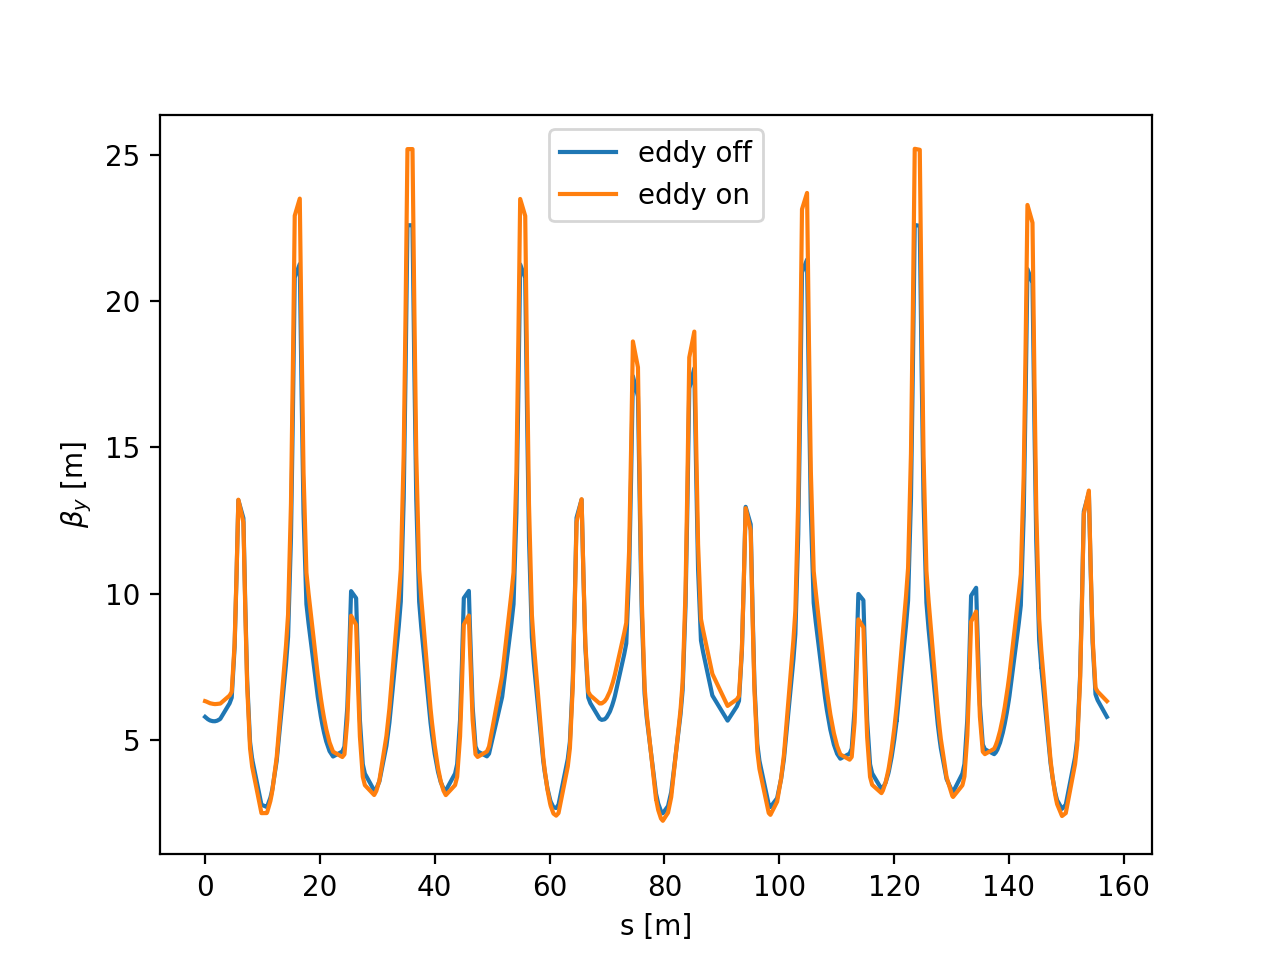

In [17]:
plt.figure(3, figsize=(6.4, 4.8))
plt.plot(tw_eddy_off.s, tw_eddy_off.bety, label='eddy off')
plt.plot(tw_eddy_off.s, tw_eddy_on.bety, label='eddy on')
plt.ylabel(r'$\beta_y$ [m]')
plt.xlabel(r's [m]')
plt.legend()

### Save line with knobs

---------